# 5 - SciPy

**Summary**
> * Integration
>> * Single integrals
>> * Multiple integrals
>> * Ordinary Differential Equation integrations
> * (Special functions)
>> * (Bessel functions)
>> * (Elliptic integrals)


SciPy tutorials: https://docs.scipy.org/doc/scipy/tutorial/index.html

## Integration

You may often encounter a function that cannot be integrated analytically or is very difficult to integrate. In this scenario, it is useful to turn to numerical integration methods. SciPy has a number of routines for performing numerical integration. Most of them are found in the same ```scipy.integrate library```. 

### Single integration

First, we will integrate a function of a single variable $x$. We will use the ```quad``` function, short for quadrature, the workhorse of SciPy’s integration functions for performing single definite integrals of a function $f(x)$. Consider the following integral

$f(x)= \int^{1}_{0} \mathrm{exp[-x^{2}]}\,  dx$


In [1]:
import scipy.integrate as intg
import numpy as np
f = lambda x : np.exp(-x**2)
''' the lambda construction produces exactly the same as below!
def f(x):
  return np.exp(-x**2)
'''

# integrates f between 0 and 1
result, error_estimate = intg.quad(f, 0, 1)
print(f"result: {result}, error estimate: {error_estimate}")

result: 0.7468241328124271, error estimate: 8.291413475940725e-15


We have used the function ```lambda``` as short for a function definition. In this case, it is functionally identical to using ```def```. The quad function returns the two values, in which the first number is the value of integral and the second value is the estimate of the absolute error in the value of integral. As you can see the error due to numerical optimization is much smaller than the estimated value, suggesting that the numerical optimization procedure is accurate.



### Multiple integration

Doing double integration is handled by the function ```dblquad```, whereas triple integration is handled by ```tplquad```. N-fold integration can be handled by ```nquad```. 
The limits of all **inner** integrals can be defined as functions. That is, we integrate with $a < x < b$, and at each $x$ we integrate from $g(x) < y < h(x)$.

We'll examine the following integral.


$f(x,y) = \int^{0.5}_{0} dx \int^{h(x)}_{0} dy \, 16 \,x \, y $

$h(x)= \sqrt{1-4\,x^2}$



In [2]:
from math import sqrt

f = lambda y, x : 16*x*y
g = lambda x : 0
h = lambda x : sqrt(1 - 4*x**2)

result, error_estimate = intg.dblquad(f, 0, 0.5, g, h)
print(f"result: {result}, error estimate: {error_estimate}")

result: 0.5, error estimate: 1.7092350012594845e-14


## Differential equation integration

In mathematics, an ordinary differential equation (ODE) is a differential equation containing one or more functions of one independent variable and the derivatives of those functions (cit. Wikipedia). 
Most of the time, these means an equation of functions of time.

The ODEint method of scipy solves one (or possibly a system of) ODE, i.e. gives the trajectory in time given a starting condition.

Let us integrate the Van der Pol oscillator, which has a function for the position of the pendulum $y$ as:

$ \frac{d^{2}y}{dt^{2}} - \mu (1-y^{2}) \frac{dy}{dt} + y=0$

This is a damped, nonlinear oscillator, parametrized by $\mu$ (the largest the $\mu$, the more non linear and damped it is).
It can be rewritten as a system of eqs:

$
\frac{dy_1}{dt} = \mu (y_1-\frac{1}{3}y_1^{3}-y_2)\\
\frac{dy_2}{dt}= \frac{1}{\mu}y_1
$

Where now $y = (y_1, y_2)$. (The original position is now $y_1$.)

In [3]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the function that calculates the derivative dy/dt
# Note that the first variables MUST be y and t, even if t is not used.
def van_der_pol_pend(y, t, mu):
  x1, x2 = y
  dydt = [mu * (x1 - 1/3 * x1**3 - x2), 1/mu * x1]
  return dydt

# initial position
y0 = [12, 0.4]

# time spatiation of the output
t = np.linspace(0, 100, 1000)

# value of mu
mu = 6

# Call the solver, giving it the function (van_der_pol_pend), the initial condition (y0), 
# the time steps for which you want output (t) and the extra arguments for the function (mu)
sol = odeint(van_der_pol_pend, y0, t, args=(mu, ))

Semi-exercise:
Now that you have the solution as a list of $[y_1(t), y_2(t)]$, plot them!
Plot them as a function of time, and as points in a 2D space. What can you see?

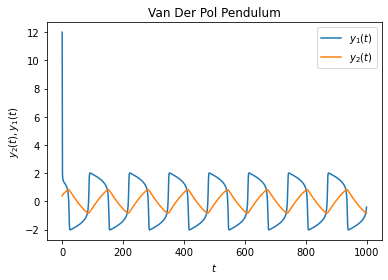

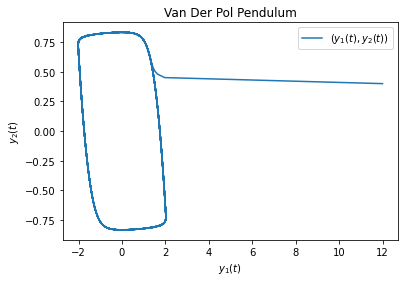

In [4]:
sol = odeint(van_der_pol_pend, y0, t, args=(mu, ))
plt.plot(sol, label=("$y_1(t)$", "$y_2(t)$"))
plt.title("Van Der Pol Pendulum")
plt.xlabel("$t$")
plt.ylabel("$y_2(t), y_1(t)$")
plt.legend()
plt.show()
plt.plot(sol.T[0], sol.T[1], label="$(y_1(t), y_2(t))$")
plt.title("Van Der Pol Pendulum")
plt.xlabel("$y_1(t)$")
plt.ylabel("$y_2(t)$")
plt.legend()
plt.show()

# 5 - Sklearn (Just for Your Information)

A library focused on Machine Learning techniques, such as:
> * Clustering
> * Classification
> * Regression

SkLearn tutorials: https://scikit-learn.org/stable/getting_started.html

#Exercise

1. "Manual integration". The simplest method for integrating a function between $a$ and $b$ is to divide the segment in $N$ parts and calculate the function at each point.

$$
\int_a^b dx f(x) \approx \sum_i^N f(x_i) (b-a)/N
$$

Using numpy arrays recreate 
$f(x)= \int^{1}_{0} \mathrm{exp[-x^{2}]}\,  dx$. Using different $Ns$ and plotting the error, can you estimate what N would you need to obtain an error of order $10^{-14}$

result: 0.7468241328124271, error estimate: 8.291413475940725e-15


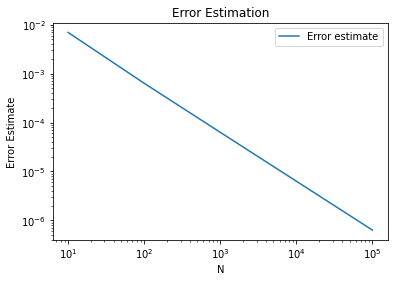

In [5]:
f = lambda x : np.exp(-x**2)
result, error_estimate = intg.quad(f, 0, 1)
print(f"result: {result}, error estimate: {error_estimate}")
N = 10
x = []
errors = []
for i in range(5):
  errors.append(abs(np.sum(f(np.linspace(0, 1, N)))/N - result))
  x.append(N)
  N *= 10
plt.title("Error Estimation")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Error Estimate")
plt.plot(x, errors, label="Error estimate")
plt.legend()
plt.show()


2. Calculate $\pi$ the dumb way. Use double integrations to calculate $\pi$. (Hint, the area of a quarter of a circle is $\pi r^2 / 4").

In [6]:
f = lambda y, x : 1
g = lambda x : 0
h = lambda x : sqrt(1 - x**2)

result, error_estimate = np.array(intg.dblquad(f, 0, 1, g, h)) * 4
print(f"result: {result}, error estimate: {error_estimate}")

result: 3.1415926535897922, error estimate: 3.533564552071766e-10


3. Lotka-Volterra. One classic model of population dynamics is the Lotka-Volterra (or prey-predator) model. It models the interaction of two populations ($y_1$, the preys and $y_2$, the predators). The model is very simple, but the results - as you will see in other courses - are still quite interesting. 

$$
d y_1 / d t = \alpha \, y_1 - \beta \, y_1 y_2 \\
d y_2 / d t = \delta \, y_1 y_2 - \gamma \, y_2 
$$

The four parameters represent: 
- $\alpha$ is growth of preys
- $\beta$ is death by hunting
- $\delta$ is growth of predators due to hunting
- $\gamma$ is intrinsic death rates of predators

using $\alpha = 2/3$, $\beta = 4/3$, $\gamma = \delta = 1$, solve the ODE evolution in time, plotting the curve of the two populations as a function of time. Try to plot different curves with different initial populations (try initial populations around 1).

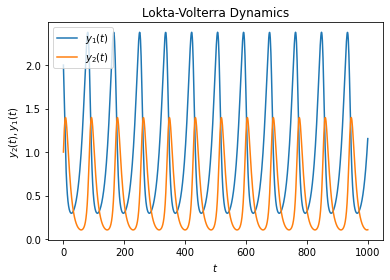

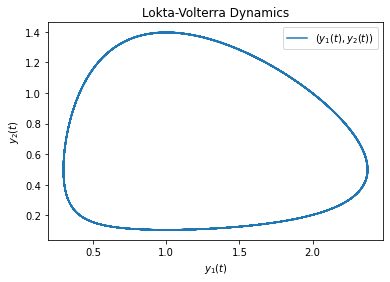

In [7]:
def lokta_volterra(y, t, alpha = 2/3, beta = 4/3, gamma = 1, delta = 1):
  x1, x2 = y
  dydt = [alpha*x1 - beta*x1*x2, delta*x1*x2 - gamma*x2]
  return dydt

y0 = [2, 1]
t = np.linspace(0, 100, 1000)
sol = odeint(lokta_volterra, y0, t)
plt.plot(sol, label=("$y_1(t)$", "$y_2(t)$"))
plt.title("Lokta-Volterra Dynamics")
plt.xlabel("$t$")
plt.ylabel("$y_2(t), y_1(t)$")
plt.legend()
plt.show()
sol = sol.T
plt.plot(sol[0], sol[1], label="$(y_1(t), y_2(t))$")
plt.title("Lokta-Volterra Dynamics")
plt.xlabel("$y_1(t)$")
plt.ylabel("$y_2(t)$")
plt.legend()
plt.show()